## Importing Libraries

In [81]:
import numpy as np
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
import os
import random
import pickle

## Loading the Dataset

In [7]:
DataDir = "D:\Deep Learning\Learning\Cats and Dogs"
Categories = ["Dog", "Cat"]

## Getting the Cats & Dogs

In [43]:
Dataset = []
for category in Categories:
    path = os.path.join(DataDir, category)
    class_num = Categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (50,50))
            Dataset.append([new_array, class_num])
        except:
            pass

### Random Shuffling the Dataset

In [193]:
random.shuffle(Dataset)

### Appending Images and Label

In [194]:
F = []
L = []
for features, label in Dataset:
    F.append(features)
    L.append(label)
F = np.array(F).reshape(-1, 50,50, 1)

0


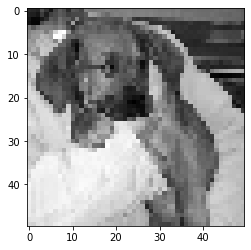

In [195]:
plt.imshow(F[0],cmap="gray")
print(L[0])
plt.show()

### Saving the Dataset using pickle

In [196]:
pickle_out = open("F.pickle","wb")
pickle.dump(F, pickle_out)
pickle_out.close()

In [197]:
pickle_out = open("L.pickle","wb")
pickle.dump(L, pickle_out)
pickle_out.close()

# Training the Dataset using CNN

## Importing the Libraries

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [199]:
pickle_in = open("F.pickle","rb")
F = pickle.load(pickle_in)

pickle_in = open("L.pickle","rb")
L = pickle.load(pickle_in)

In [200]:
F = tf.keras.utils.normalize(F, axis =1)

1


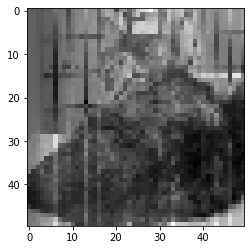

In [201]:
print(L[1])
plt.imshow(F[1],cmap="gray")
plt.show()

In [202]:
F_train = F[:20000]
F_test = F[20000:]

L_train = L[:20000]
L_test = L[20000:]

In [203]:
print("Features Train Dataset: ",len(F_train))
print("Features Test Dataset: ",len(F_test))
print("Labels Train Dataset: ",len(L_train))
print("Labels Test Dataset: ",len(L_test))

Features Train Dataset:  20000
Features Test Dataset:  4946
Labels Train Dataset:  20000
Labels Test Dataset:  4946


In [209]:
F_train = np.array(F_train)
L_train = np.array(L_train)
F_test = np.array(F_test)
L_test = np.array(L_test)

0


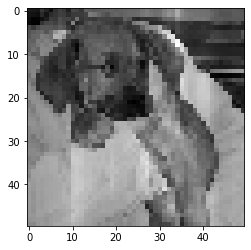

In [210]:
print(L_train[0])
plt.imshow(F_train[0],cmap="gray")
plt.show()

In [211]:
cnn = Sequential([
    
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(50,50,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(50,50,1)),
    layers.MaxPooling2D((2,2)),
    
    #Dense
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(2, activation="softmax")
    
])

In [212]:
cnn.compile(optimizer="adam",
            loss ="sparse_categorical_crossentropy",
            metrics = ["accuracy"]
)


In [214]:
cnn.fit(F_train, L_train, epochs=10)

Epoch 1/10
625/625 [==============================] - 118s 73ms/step - loss: 0.6390 - accuracy: 0.6272
Epoch 2/10
625/625 [==============================] - 45s 72ms/step - loss: 0.5367 - accuracy: 0.7308
Epoch 3/10
625/625 [==============================] - 44s 71ms/step - loss: 0.4908 - accuracy: 0.7657
Epoch 4/10
625/625 [==============================] - 45s 71ms/step - loss: 0.4623 - accuracy: 0.7824
Epoch 5/10
625/625 [==============================] - 45s 72ms/step - loss: 0.4325 - accuracy: 0.7991
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3980 - accuracy: 0.8213
Epoch 7/10
625/625 [==============================] - 47s 75ms/step - loss: 0.3652 - accuracy: 0.8349
Epoch 8/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3279 - accuracy: 0.8576
Epoch 9/10
625/625 [==============================] - 45s 72ms/step - loss: 0.2874 - accuracy: 0.8770
Epoch 10/10
625/625 [==============================] - 44s 71ms/step - loss: 0.24

In [215]:
val_loss, val_acc = cnn.evaluate(F_test,L_test)
print(val_loss, val_acc)

155/155 [==============================] - 40s 20ms/step - loss: 0.5221 - accuracy: 0.7750
0.5221267342567444 0.7749696969985962
